In [16]:
# Code Implementing Linear Discriminant Analysis and Quadratic Discriminant Analysis

import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

def LDA(datax,datay):
    model = LinearDiscriminantAnalysis()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model, datax, datay, scoring='accuracy', cv=cv, n_jobs=-1)
    print(np.mean(scores))

def QDA(datax,datay):
    model = QuadraticDiscriminantAnalysis()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model, datax, datay, scoring='accuracy', cv=cv, n_jobs=-1)
    print(np.mean(scores))


In [18]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataframe = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
dataframe2 = dataframe.iloc[:,0:4]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataframe2)
datax = pd.DataFrame(data_scaled, columns = ['sepal length','sepal width','petal length','petal width'])
datay = dataframe.iloc[:,-1]

LDA(datax,datay)
QDA(datax,datay)

0.9786666666666668
0.9746666666666668


In [2]:
# Code Implementing a Support Vector Machine Classifier

import pandas as pd 
import numpy as np
import sklearn
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import sys

def processData(X,y):
    X = preprocessing.scale(X)
    X,y = shuffle(X,y)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20)
    scaler = preprocessing.StandardScaler().fit(x_train)
    x_train=scaler.transform(x_train)
    x_test=scaler.transform(x_test)
    return x_train,x_test, list(y_train), list(y_test)

def buildSVM(data):
    model = svm.SVC()
    model.fit(data[0],data[1])
    return model

def getAcc(model,x_test,y_test, str_rep, partial):
    predictions = model.predict(x_test)
    # print(predictions)
    # print(predictions,y_test)
    predictions = [1 if predictions[i]>=.5 else 0 for i in range(len(predictions))]
    # print(y_test,'\n',predictions)
    m=len(y_test)
    acc = sum([1 if y_test[i]==predictions[i] else 0 for i in range(m)])/m
    if partial:
        str_rep="partial "+str_rep
    print("the testing accuracy for {} is {}".format(str_rep,acc))
    return None

def plotclassifier(model,title,x_test,y_test,partial):
    if partial:
        plot_decision_regions(x_test,np.asarray(y_test).astype(int),clf=model,legend=2)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)
        plt.show()

def runModels(X,y,partial=False):
    x_train,x_test,y_train,y_test = processData(X,y)
    train = (x_train,y_train)
    SVM = buildSVM(train)
    getAcc(SVM, x_test, y_test,"Support Vector Machine", partial)


In [3]:
data = pd.read_csv("Option1_data.csv")
X=data.iloc[:,:-1]
y = data.iloc[:,-1]
X_partial = data.iloc[:,:2]

runModels(X,y)

the testing accuracy for Support Vector Machine is 0.9411764705882353


In [4]:
# Code Implenting a Neural Network

import pandas as pd 
import numpy as np
import sklearn
import sklearn.preprocessing as preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2 
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

def buildNetwork(data):
    n=data[0].shape[1]
    reg=l2(1e-4)
    y_train = np.asarray(data[1]).astype(int)

    if data[0].shape[1]>3:
        model = Sequential([
        Input(shape=(n,)),
        Dense(n, activation="relu"),
        Dense(n//2, activation="relu"),
        Dense(1,activation="sigmoid")
        ])
        model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
        y_train = np.asarray(data[1])
        model.fit(
        data[0],
        y_train,
        epochs=5)
    else:
        x_train, x_val, y_train, y_val = train_test_split(data[0], y_train, test_size = .20)
        model = Sequential([
        Input(shape=(n,)),
        # Dense(n, activation="relu"),
        Dense(n//2, activation="relu"),
        Dense(1,kernel_regularizer=reg,bias_regularizer=reg,activation="sigmoid")
        ])
        model.compile(loss='binary_crossentropy',optimizer = SGD(learning_rate=0.05,momentum=0.05))# optimizer="adam")#, metrics=['accuracy'])
        model.fit(
        x_train,
        y_train,
        batch_size=16,
        epochs=50,
        validation_data=(x_val,y_val),)
    return model


def processData(X,y):
    # X = preprocessing.scale(X)
    X,y = shuffle(X,y)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20)
    scaler = preprocessing.StandardScaler().fit(x_train)
    x_train=scaler.transform(x_train)
    x_test=scaler.transform(x_test)
    return x_train,x_test, list(y_train), list(y_test)

def getAcc(model,x_test,y_test, str_rep, partial):
    predictions = model.predict(x_test)
    # print(predictions)
    # print(predictions,y_test)
    predictions = [1 if predictions[i]>=.5 else 0 for i in range(len(predictions))]
    # print(y_test,'\n',predictions)
    m=len(y_test)
    acc = sum([1 if y_test[i]==predictions[i] else 0 for i in range(m)])/m
    if partial:
        str_rep="partial "+str_rep
    print("the testing accuracy for {} is {}".format(str_rep,acc))
    return None

def runModels(X,y,partial=False):
    x_train,x_test,y_train,y_test = processData(X,y)
    train = (x_train,y_train)
    NN = buildNetwork(train)
    getAcc(NN,x_test,y_test,"Neural Network",partial)



In [5]:
data = pd.read_csv("Option1_data.csv")
X=data.iloc[:,:-1]
y = data.iloc[:,-1]
X_partial = data.iloc[:,:2]

runModels(X,y)

Train on 135 samples
Epoch 1/5
135/135 [==============================] - 3s 19ms/sample - loss: 0.7846 - accuracy: 0.4667
Epoch 2/5
135/135 [==============================] - 0s 319us/sample - loss: 0.5008 - accuracy: 0.6963
Epoch 3/5
135/135 [==============================] - 0s 293us/sample - loss: 0.3246 - accuracy: 0.9556
Epoch 4/5
135/135 [==============================] - 0s 289us/sample - loss: 0.2144 - accuracy: 0.9852
Epoch 5/5
135/135 [==============================] - 0s 274us/sample - loss: 0.1530 - accuracy: 0.9852
the testing accuracy for Neural Network is 0.9705882352941176


In [36]:
# Code Implementing Kmeans Clustering
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

def Kmeans(data,clustermax):

    SSE = []
    for k in range(1,clustermax):
        kmeans = KMeans( init="random", n_clusters=k, n_init=10, max_iter=300, random_state=69 )
        kmeans.fit(data)
        SSE.append(kmeans.inertia_)

    kl = KneeLocator(range(1, clustermax), SSE, curve="convex", direction="decreasing")
    kmeans = KMeans( init="random", n_clusters=kl.elbow, n_init=10, max_iter=300, random_state=69 )
    y_km = kmeans.fit_predict(data)
    
    
    for k in range(kl.elbow):
        plt.scatter(data[y_km == k, 1], data[y_km == k, 0], edgecolor='black',label='cluster %s' % (k))
    
    
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()
            


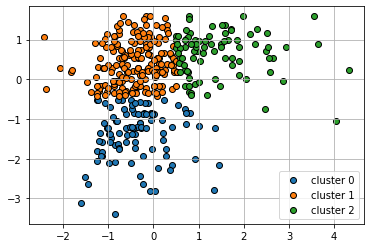

In [37]:
# Data Preprocessing and Standardization

data = pd.read_csv('clustering.csv')
dataset = data[["LoanAmount","ApplicantIncome"]]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)

clustermax = 10 # Cannot be larger than 10 for this code

Kmeans(data_scaled,clustermax)

[[ 8.12575187e-01  7.07468765e-01]
 [-1.37659578e+00 -4.08932206e-01]
 [ 5.30101514e-01 -7.03018880e-01]
 [ 1.27159491e+00  1.70679926e+00]
 [-3.52628717e-01 -8.79329836e-01]
 [-1.23535895e+00 -2.67883442e-01]
 [ 1.41700212e-01 -7.61554118e-01]
 [ 3.18246258e-01 -1.21784687e+00]
 [-3.10674704e+00 -1.60855195e+00]
 [ 7.06647560e-01  9.66293248e-01]
 [-1.76082671e-01  1.13931122e-02]
 [-1.02350369e+00 -4.92578566e-02]
 [ 9.89121233e-01  9.21862887e-01]
 [ 3.53555468e-01 -6.91029735e-01]
 [-3.48458338e-02  2.87750401e+00]
 [ 3.88864677e-01 -6.91029735e-01]
 [ 2.47627840e-01 -1.51518211e-01]
 [ 6.00719932e-01 -5.50686215e-01]
 [ 1.77009422e-01  4.55696721e-01]
 [-2.47118127e+00 -1.50770208e+00]
 [ 5.30101514e-01  1.20000661e-01]
 [-1.09412211e+00 -2.91156488e-01]
 [ 3.57725847e-02  7.84340342e-01]
 [ 3.18246258e-01 -5.63102948e-02]
 [-1.76082671e-01 -1.23547797e+00]
 [ 1.37752253e+00  6.14654236e-02]
 [ 1.77009422e-01  1.18590173e-01]
 [-8.82266855e-01  1.42140874e-02]
 [-2.04747076e+00 -1

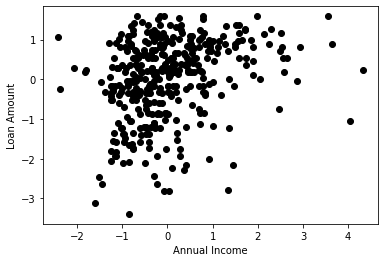

In [21]:
# Visualizing Our Data
print(data_scaled)

plt.scatter(data_scaled[:,1],data_scaled[:,0],c='black')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

In [79]:
# Code Implenting Principal Component Analysis

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def PCAfunc(data_scaled,dataframe,PCA_num):
    pca = PCA(n_components = PCA_num)
    principalComponents = pca.fit_transform(data_scaled)
    principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
    
    finalDF = pd.concat([principalDf, dataframe[['target']]], axis = 1)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDF['target'] == target
        ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    ax.legend(targets)
    ax.grid()

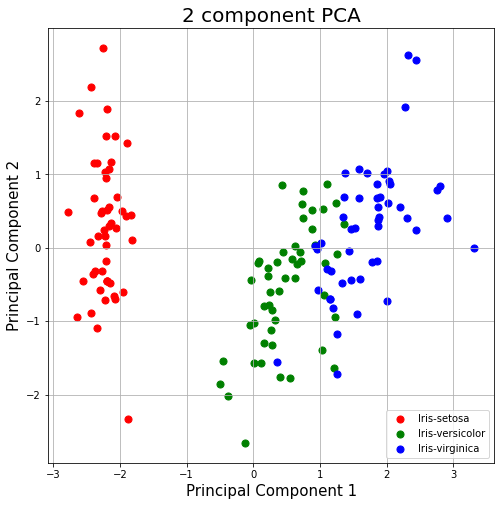

In [80]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataframe = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
dataframe2 = dataframe.iloc[:,0:4]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataframe2)

PCA_num = 2   #Number of Principal Components Desired, Cannot be Larger than Total Column Number

PCAfunc(data_scaled,dataframe,PCA_num)


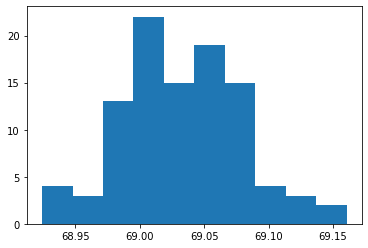

<function matplotlib.pyplot.show(*args, **kw)>

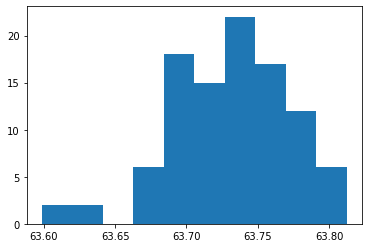

In [25]:
# Code Implenting Data Bootstrapping

from sklearn.utils import resample
import statistics as stat
import matplotlib.pyplot as plt

data = pd.read_csv("weight-height.csv")
menheight = data.iloc[0:5000,:-1]
womenheight = data.iloc[5001:-1]
mmed = []
wmed = []

for ind in range(100):
    boot1 = resample(menheight["Height"], replace=True, n_samples=5000, random_state=ind)
    boot2 = resample(womenheight["Height"],replace=True,n_samples=4997,random_state=ind)
    
    mmed.append(stat.median(boot1))
    wmed.append(stat.median(boot2))
    
plt.hist(mmed,10)
plt.show()

plt.hist(wmed,10)
plt.show

In [48]:
# Code Implenting Adaboost Algorithm
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

def adaboostreg(train_datax,train_datay,test_datax,test_datay):
    model = AdaBoostRegressor()
    model.fit(train_datax,train_datay)
    
    
    MAE = []
    for ind in range(len(test_datax)):
        yhat = model.predict([test_datax.iloc[ind,:]])
        MAE.append(abs(yhat-test_datay.iloc[ind]))
    print(sum(MAE)/len(MAE))
        
    

In [49]:
data = pd.read_csv("winequality-white.csv",delimiter=";")
train_datax = data.iloc[0:3918,0:11]
train_datay = data.iloc[0:3918,-1]
test_datax = data.iloc[3919:4899,0:11]
test_datay = data.iloc[3919:4899,-1]

adaboostreg(train_datax,train_datay,test_datax,test_datay)

[0.53440991]
